# Introduction

In this notebook we do a basic data exploratory analysis of the datasets we will be using to evaluate the RTABMAP and ORBSLAM2 SLAM algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gt = pd.read_csv('gt.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})
odom = pd.read_csv('odom.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})
slam = pd.read_csv('slam.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})

FileNotFoundError: [Errno 2] No such file or directory: 'gt.txt'

We get 3 different files from 3 different sensors. One file for the ground truth, one file for the SLAM trajectory estimation, one file for the odometry trajectory estimation. We use the ground truth to compare to rest of the files to calculate the Absolute Trajectory Error(using the SLAM trajectory) and Relative Pose Error (using the odometry trajectory).

Each dataset has 8 columns. The first column is the 'timestamp', the next three columns are transformation vectors that could be interpreted as the 'x', 'y', and 'z' positions of the robot. The last four columns are the rotational vectors that control how the car turns which can be interpreted as, roll(qx), pitch(qy), yaw(qz) and angle(qw).

### Ground Truth Data:

In [3]:
gt.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.500790,-6.001145,0.099998,-0.000003,0.000004,0.705714,0.708496
1,940.265,5.504727,-5.268473,0.206342,0.194955,-0.196317,0.677121,0.681879
2,941.265,5.522249,-2.882402,0.100001,0.000001,-0.000001,0.704491,0.709713
3,942.315,5.539723,-0.470066,0.100001,-0.000000,0.000000,0.704610,0.709595
4,943.315,5.436194,-0.086068,0.100001,0.000003,0.000001,0.474605,0.880199


### Odometry Data:

In [4]:
odom.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.500790,-6.001146,0.100000,0.000002,0.000001,0.705714,0.708496
1,940.265,5.504744,-5.266027,0.206238,0.194725,-0.196092,0.677186,0.681945
2,941.265,5.522266,-2.880105,0.100001,0.000001,0.000001,0.704491,0.709713
3,942.315,5.539739,-0.467770,0.099996,-0.000001,-0.000007,0.704610,0.709594
4,943.315,5.436188,-0.086096,0.100000,-0.000007,-0.000004,0.474418,0.880300


### SLAM Data:

In [5]:
slam.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.797664,-5.713663,0.099832,-0.000036,-0.000062,0.726199,0.687485
1,940.265,5.758476,-4.979581,0.206093,0.200359,-0.190354,0.696915,0.661764
2,941.265,5.657774,-3.017038,0.099917,-0.000036,-0.000062,0.724988,0.688762
3,942.315,5.533881,-0.607824,0.099989,-0.000038,-0.000070,0.725104,0.688640
4,943.315,5.408146,-0.232873,0.099989,-0.000026,-0.000075,0.500014,0.866018


## Time Stamp Column:

Since all 3 datasets are collected at the same time, there is no variation between the 3 datasets.

In [1]:
plt.plot(gt['timestamp'].values)
plt.plot(odom['timestamp'].values)
plt.plot(slam['timestamp'].values)
plt.legends(['Ground Truth', 'Odometry', 'SLAM'])

NameError: name 'plt' is not defined

## X and Y Columns:

If we were to graph these two columns, we are able to see the trajectory of the car.

Text(0, 0.5, 'y')

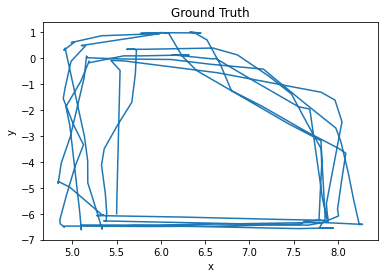

In [7]:
plt.plot(gt['x'].values, gt['y'].values)
plt.title('Ground Truth')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

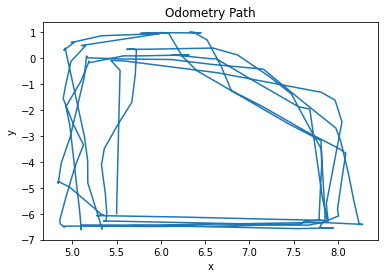

In [8]:
plt.plot(odom['x'].values, odom['y'].values)
plt.title('Odometry Path')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

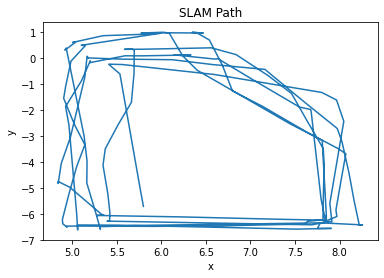

In [9]:
plt.plot(slam['x'].values, slam['y'].values)
plt.title('SLAM Path')
plt.xlabel('x')
plt.ylabel('y')

We can see that they all seem to plot the same path which is a good sign

## Z Column:

Since there is no elevation change in the simulation, our 'z' values are similar

Average Value: 0.10359834857142858
Average Value: 0.10359120571428572
Average Value: 0.10359844


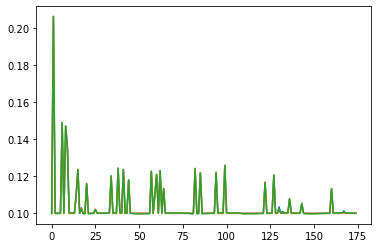

In [10]:
plt.plot(gt['z'].values)
plt.plot(odom['z'].values)
plt.plot(slam['z'].values)
print("Average Value:", np.mean(gt['z'].values))
print("Average Value:", np.mean(odom['z'].values))
print("Average Value:", np.mean(slam['z'].values))

## Rotational Vectors:

### Vectors r_x, r_y:

The last four columns are the quarternions. We generally see the rotaional values change when the x and y values have a change in direction.

Since this is a car, there is no pitch and roll, the first two rotional vectors, they are relatively the same across all 2 datasets. 

Average Value: 0.0019899542857142855
Average Value: 0.001993165714285714
Average Value: 0.0020263200000000003


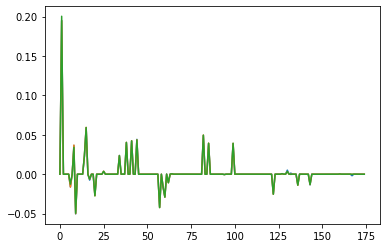

In [11]:
plt.plot(gt['r_x'].values)
plt.plot(odom['r_x'].values)
plt.plot(slam['r_x'].values)
print("Average Value:", gt['r_x'].mean())
print("Average Value:", odom['r_x'].mean())
print("Average Value:", slam['r_x'].mean())

Average Value: 0.0009051485714285715
Average Value: 0.0009044285714285718
Average Value: 0.0008938800000000001


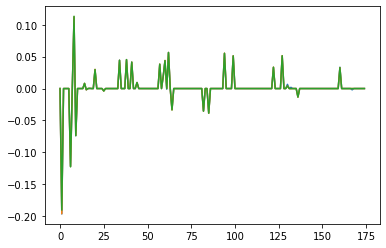

In [12]:
plt.plot(gt['r_y'].values)
plt.plot(odom['r_y'].values)
plt.plot(slam['r_y'].values)
print("Average Value:", gt['r_y'].mean())
print("Average Value:", odom['r_y'].mean())
print("Average Value:", slam['r_y'].mean())

### Vectors r_w:

The angle of the wheel also stays relatively the same across all 3 datasets.

Average Value: 0.6292512971428571
Average Value: 0.6292713714285715
Average Value: 0.6286748742857142


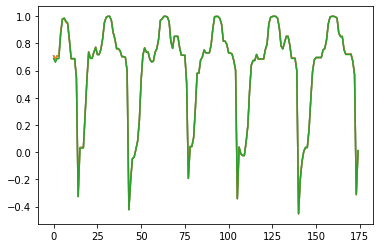

In [13]:
plt.plot(gt['r_w'].values)
plt.plot(odom['r_w'].values)
plt.plot(slam['r_w'].values)
print("Average Value:", gt['r_w'].mean())
print("Average Value:", odom['r_w'].mean())
print("Average Value:", slam['r_w'].mean())

The last 2 columns correspond with the 'yaw' of the car and the true data.

### Vectors r_z:

#### Ground Truth:

If we look at the graph, we see that the first turn occurs around the 6th row. It is also where there is a change in direction in the y column.

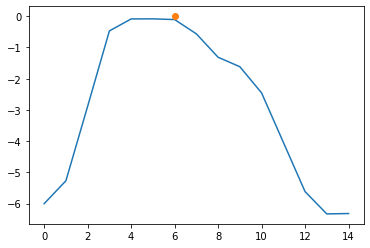

In [14]:
plt.plot(gt['y'].values[:15])
plt.plot(6, 0,'o')

In [15]:
print('Rotional Data:',gt['r_z'].values[:15])
print()
print('Approximate Value Before Turn:', gt['r_z'].values[5])
print('Approximate Value After Turn:', gt['r_z'].values[6])

Rotional Data: [ 0.705714  0.677121  0.704491  0.70461   0.474605  0.190771 -0.130919
 -0.285792 -0.309384 -0.561058 -0.726555 -0.726527 -0.726527 -0.836952
  0.945419]

Approximate Value Before Turn: 0.190771
Approximate Value After Turn: -0.130919


We see that the rotation values also shift at the 6th index when the y position changed.

This can be seen through the 3 datasets too

#### Odometry Data:

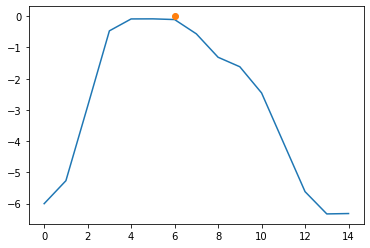

In [16]:
plt.plot(odom['y'].values[:15])
plt.plot(6, 0,'o')

In [17]:
print('Rotional Data:',odom['r_z'].values[:15])
print()
print('Approximate Value Before Turn:', odom['r_z'].values[5])
print('Approximate Value After Turn:', odom['r_z'].values[6])

Rotional Data: [ 0.705714  0.677186  0.704491  0.70461   0.474418  0.190396 -0.130913
 -0.285791 -0.309714 -0.561086 -0.726555 -0.726527 -0.726526 -0.83704
  0.945478]

Approximate Value Before Turn: 0.190396
Approximate Value After Turn: -0.130913


#### SLAM Data:

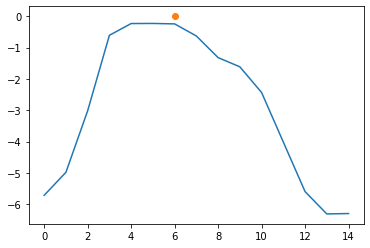

In [18]:
plt.plot(slam['y'].values[:15])
plt.plot(6, 0,'o')

In [19]:
print('Rotional Data:',slam['r_z'].values[:15])
print()
print('Approximate Value Before Turn:', slam['r_z'].values[5])
print('Approximate Value After Turn:', slam['r_z'].values[6])

Rotional Data: [ 0.726199  0.696915  0.724988  0.725104  0.500014  0.219085 -0.10203
 -0.262024 -0.286302 -0.55605  -0.724434 -0.724406 -0.724405 -0.835349
  0.944475]

Approximate Value Before Turn: 0.219085
Approximate Value After Turn: -0.10203
